In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math
from scipy.integrate import odeint
import pandas as pd
import seaborn
from scipy import stats

In [12]:
df = pd.read_csv('result_toxin.csv')

In [13]:
print(np.size(df,0))#.Antimicrobial_resistance_chromosome[i]

34688


In [14]:
ToxinChro=np.zeros(np.size(df,0))
BioChro=np.zeros(np.size(df,0))
ToxinPlas=np.zeros(np.size(df,0))
BioPlas=np.zeros(np.size(df,0))
PlasNum=np.zeros(np.size(df,0))
for i in range(np.size(df,0)):
    ToxinChro[i]=df.toxin_chromosome[i]
    BioChro[i]=df.biofilm_chromosome[i]
    ToxinPlas[i]=df.toxin_plasmid[i]
    BioPlas[i]=df.biofilm_plasmid[i]
    PlasNum[i]=df.plasmid_count[i]

In [15]:
PP0ToxinPlas=[]
PP1ToxinPlas=[]
PP0ToxinPerPlas=[]
PP1ToxinPerPlas=[]
PP0ToxinChro=[]
PP1ToxinChro=[]
PP0ToxinTot=[]
PP1ToxinTot=[]


for i in range(len(BioChro)):
    if BioChro[i]+BioPlas[i]==0 and PlasNum[i]==0:
        #PP0ToxinPlas.append(ToxinPlas[i])
        PP0ToxinChro.append(ToxinChro[i])
        PP0ToxinTot.append(ToxinPlas[i]+ToxinChro[i])
    if BioChro[i]+BioPlas[i]==0 and PlasNum[i]>0:
        PP0ToxinPlas.append(ToxinPlas[i])
        PP0ToxinPerPlas.append(ToxinPlas[i]/PlasNum[i])
        PP0ToxinChro.append(ToxinChro[i])
        PP0ToxinTot.append(ToxinPlas[i]+ToxinChro[i])
    if BioChro[i]+BioPlas[i]>0 and PlasNum[i]==0:
        #PP1ToxinPlas.append(ToxinPlas[i])
        PP1ToxinChro.append(ToxinChro[i])
        PP1ToxinTot.append(ToxinPlas[i]+ToxinChro[i])
    if BioChro[i]+BioPlas[i]>0 and PlasNum[i]>0:
        PP1ToxinPlas.append(ToxinPlas[i])
        PP1ToxinPerPlas.append(ToxinPlas[i]/PlasNum[i])
        PP1ToxinChro.append(ToxinChro[i])
        PP1ToxinTot.append(ToxinPlas[i]+ToxinChro[i])

8.80903786006095e-74


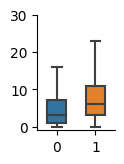

In [16]:
plt.figure(figsize=(1,1.5))
seaborn.boxplot([PP0ToxinPlas,PP1ToxinPlas],fliersize=0,width=0.5)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.tick_params(direction='out')
plt.ylim(-1,30)
tstat, pval = stats.ttest_ind(a=PP0ToxinPlas, b=PP1ToxinPlas, alternative="two-sided")
plt.savefig('Toxin_1.pdf')
print(pval)

4.3848029447009116e-42


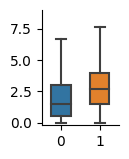

In [17]:
plt.figure(figsize=(1,1.5))
seaborn.boxplot([PP0ToxinPerPlas,PP1ToxinPerPlas],fliersize=0,width=0.5)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.tick_params(direction='out')
plt.ylim(-0.2,9)
tstat, pval = stats.ttest_ind(a=PP0ToxinPerPlas, b=PP1ToxinPerPlas, alternative="two-sided")
plt.savefig('Toxin_2.pdf')
print(pval)

0.0


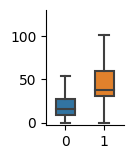

In [18]:
plt.figure(figsize=(1,1.5))
seaborn.boxplot([PP0ToxinChro,PP1ToxinChro],fliersize=0,width=0.5)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.tick_params(direction='out')
plt.ylim(-3,130)
tstat, pval = stats.ttest_ind(a=PP0ToxinChro, b=PP1ToxinChro, alternative="two-sided")
plt.savefig('Toxin_3.pdf')
print(pval)

In [19]:
print(np.mean(PP0ToxinTot))

23.458569607455274


0.0


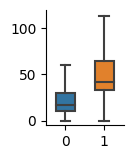

In [20]:
plt.figure(figsize=(1,1.5))
seaborn.boxplot([PP0ToxinTot,PP1ToxinTot],fliersize=0,width=0.5)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.tick_params(direction='out')
plt.ylim(-5,120)
tstat, pval = stats.ttest_ind(a=PP0ToxinTot, b=PP1ToxinTot, alternative="two-sided")
plt.savefig('Toxin_4.pdf')
print(pval)